In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [8]:
df.isnull().sum() # dataset has no missing values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [10]:
x = df.drop('target',axis=1)
y = df['target']

In [11]:
y.value_counts()

target
1    526
0    499
Name: count, dtype: int64

In [12]:
categorical_cols = ['sex','cp','fbs','restecg','exang','slope','ca','thal']

In [13]:
x_processed = pd.get_dummies(x,columns = categorical_cols,drop_first=True)

In [14]:
x_processed.head()

,age,trestbps,chol,thalach,oldpeak,sex_1,cp_1,cp_2,cp_3,fbs_1,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,125,212,168,1.0,True,False,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,53,140,203,155,3.1,True,False,False,False,True,...,True,False,False,False,False,False,False,False,False,True
2,70,145,174,125,2.6,True,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,61,148,203,161,0.0,True,False,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,62,138,294,106,1.9,False,False,False,False,True,...,False,True,False,False,False,True,False,False,True,False


In [16]:
x_train,x_test,y_train,y_test = train_test_split(x_processed,y,test_size=0.2,random_state = 42)

In [20]:
dtree = DecisionTreeClassifier(random_state=42)

In [21]:
dtree.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [22]:
y_train_pred_dt = dtree.predict(x_train)

In [33]:
train_accuracy_dt = accuracy_score(y_train,y_train_pred_dt)

In [34]:
print(f"\nDecision Tree Training Accuracy: {train_accuracy_dt:.4f}")


Decision Tree Training Accuracy: 1.0000


In [35]:
y_test_pred_dt = dtree.predict(x_test)

In [36]:
test_accuracy_dt = accuracy_score(y_test,y_test_pred_dt)

In [37]:
print(f"Decision Tree Test Accuracy (initial): {test_accuracy_dt:.4f}")

Decision Tree Test Accuracy (initial): 1.0000


In [38]:
from sklearn.tree import export_graphviz
import graphviz
import os

In [39]:
dot_data = export_graphviz(dtree,out_file=None,feature_names=x_processed.columns,
                           class_names=['No Disease','Disease'],filled=True,
                           rounded=True,special_characters=True)

In [40]:
graph = graphviz.Source(dot_data)

In [44]:
if train_accuracy_dt > test_accuracy_dt + 0.1: 
    print("Observation: The initial Decision Tree shows signs of overfitting (training accuracy is significantly higher than test accuracy).")
else:
    print("Observation: The initial Decision Tree does not show strong signs of overfitting, or it's well-balanced.")

Observation: The initial Decision Tree does not show strong signs of overfitting, or it's well-balanced.


In [47]:
#Controlling Tree Depth
depths = [3, 5, 7, 10] 
best_dt_test_accuracy = 0
best_dt_depth = 0

for depth in depths:
    dtree_controlled = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dtree_controlled.fit(x_train, y_train)

    y_train_pred_controlled = dtree_controlled.predict(x_train)
    train_accuracy_controlled = accuracy_score(y_train, y_train_pred_controlled)

    y_test_pred_controlled = dtree_controlled.predict(x_test)
    test_accuracy_controlled = accuracy_score(y_test, y_test_pred_controlled)

    print(f"Max Depth: {depth}")
    print(f"  Training Accuracy: {train_accuracy_controlled:.4f}")
    print(f"  Test Accuracy: {test_accuracy_controlled:.4f}")

    if test_accuracy_controlled > best_dt_test_accuracy:
        best_dt_test_accuracy = test_accuracy_controlled
        best_dt_depth = depth

print(f"\nBest Decision Tree Test Accuracy with controlled depth: {best_dt_test_accuracy:.4f} (at max_depth={best_dt_depth})")

Max Depth: 3
  Training Accuracy: 0.8524
  Test Accuracy: 0.7951
Max Depth: 5
  Training Accuracy: 0.9037
  Test Accuracy: 0.8683
Max Depth: 7
  Training Accuracy: 0.9476
  Test Accuracy: 0.9073
Max Depth: 10
  Training Accuracy: 0.9854
  Test Accuracy: 0.9707

Best Decision Tree Test Accuracy with controlled depth: 0.9707 (at max_depth=10)


In [48]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
rf_clf = RandomForestClassifier(n_estimators=100,random_state=42)

In [51]:
rf_clf.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [52]:
y_train_pred_rf = rf_clf.predict(x_train)

In [53]:
train_accuracy_rf = accuracy_score(y_train,y_train_pred_rf)

In [54]:
train_accuracy_rf

1.0

In [55]:
y_test_pred_rf = rf_clf.predict(x_test)

In [56]:
test_accuracy_rf = accuracy_score(y_test,y_test_pred_rf)

In [57]:
test_accuracy_rf

1.0

In [58]:
import matplotlib.pyplot as plt
import numpy as np

In [60]:
#Model Comparison
print(f"Best Decision Tree Test Accuracy (controlled depth): {best_dt_test_accuracy:.4f}")
print(f"Random Forest Test Accuracy: {test_accuracy_rf:.4f}")

Best Decision Tree Test Accuracy (controlled depth): 0.9707
Random Forest Test Accuracy: 1.0000


In [61]:
print("Observation: Random Forest is performing better")

Observation: Random Forest is performing better


In [71]:
#Feature importance
importances = rf_clf.feature_importances_
feature_importances = pd.Series(importances,index=x_processed.columns)
feature_importances = feature_importances.sort_values(ascending=False)

In [72]:
feature_importances

oldpeak      0.120946
thalach      0.116000
thal_3       0.095136
thal_2       0.091893
chol         0.088077
age          0.083778
trestbps     0.071788
exang_1      0.045965
slope_2      0.040217
ca_1         0.033916
sex_1        0.032582
cp_2         0.032306
slope_1      0.029990
ca_2         0.028645
cp_3         0.019389
restecg_1    0.018281
cp_1         0.016886
ca_3         0.015746
fbs_1        0.009975
thal_1       0.005747
ca_4         0.001977
restecg_2    0.000763
dtype: float64

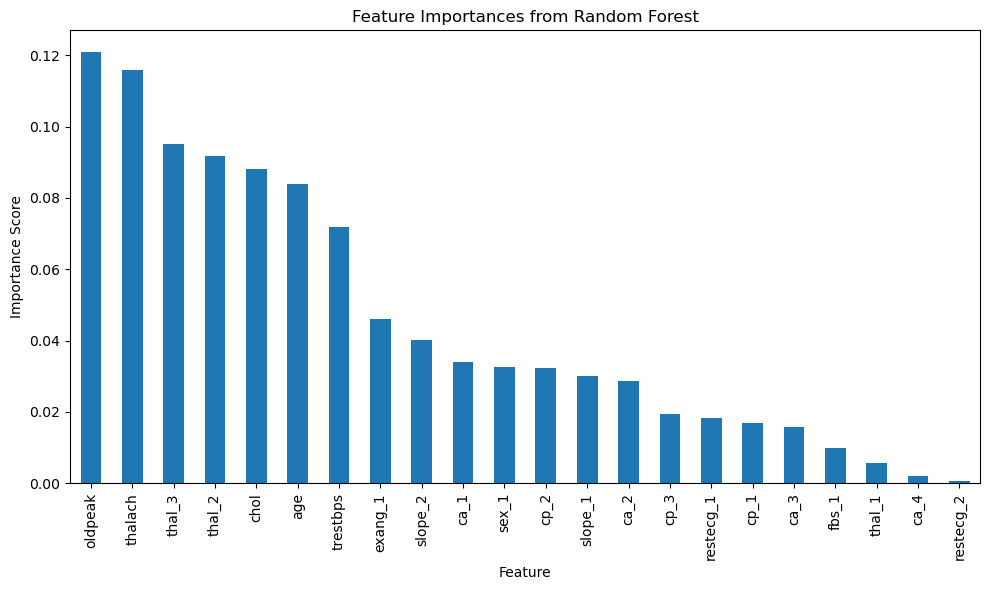

In [76]:
plt.figure(figsize=(10, 6))
feature_importances.plot(kind='bar')
plt.title('Feature Importances from Random Forest')
plt.ylabel('Importance Score')
plt.xlabel('Feature')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [77]:
from sklearn.model_selection import cross_val_score

In [80]:
#Cross-Validation for Random Forest
cv_scores = cross_val_score(rf_clf, x_processed, y, cv=5, scoring='accuracy')

print(f"Cross-validation scores (5 folds): {cv_scores}")
print(f"Mean cross-validation accuracy: {cv_scores.mean():.4f}")
print(f"Standard deviation of cross-validation scores: {cv_scores.std():.4f}")

Cross-validation scores (5 folds): [1.         1.         0.97073171 0.98536585 0.98536585]
Mean cross-validation accuracy: 0.9883
Standard deviation of cross-validation scores: 0.0110


In [82]:
dtree_final = DecisionTreeClassifier(max_depth=best_dt_depth, random_state=42)
cv_scores_dt = cross_val_score(dtree_final, x_processed, y, cv=5, scoring='accuracy')
print(f"DT Cross-validation scores (5 folds): {cv_scores_dt}")
print(f"DT Mean cross-validation accuracy: {cv_scores_dt.mean():.4f}")

DT Cross-validation scores (5 folds): [1.         1.         0.98536585 0.97073171 0.98536585]
DT Mean cross-validation accuracy: 0.9883
